In [1]:
from datetime import datetime, timedelta
import time
from collections import namedtuple
import pandas as pd
import requests
import matplotlib.pyplot as plt

%matplotlib inline
import sklearn
from sklearn.preprocessing import scale 
from collections import Counter

In [4]:
 target_date = datetime(2016, 5, 16)
features = ["date", "meantempm", "MaxTemp", "meanpressurem", "maxhumidity", "minhumidity", "MinTemp",
             "maxdew", "mindew", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)  # named tuples are special types of tuples, backward compatible

def extract_weather_data(url, api_key, target_date, days):
    records = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]   # extract history and dailysummary part of json
            # print (data)
            records.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                 MaxTemp=data['MaxTemp']
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
               
                MinTemp=data['MinTemp'],
                maxdew=data['maxdewp'],
                mindewp=data['mindew'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        target_date += timedelta(days=1)
    return records


In [8]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weather_summer.csv').set_index('date')

In [12]:
df.head()      

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20


In [13]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,122.0,29.524590,2.167426,23.0,28.0,30.0,31.0,37.0
MaxTemp,122.0,32.418033,2.292064,26.0,31.0,33.0,34.0,36.0
MinTemp,122.0,26.475410,2.912535,20.0,25.0,27.0,28.0,38.0
meantempm_1,122.0,28.680328,2.238899,24.0,27.0,29.0,30.0,33.0
maxdew,122.0,24.573770,1.360105,21.0,24.0,25.0,26.0,26.0
mindew,122.0,21.909836,1.342282,20.0,21.0,22.0,23.0,24.0


In [14]:
tmp = df[['meantempm', 'mindew']].head(10)  
tmp

,meantempm,mindew
date,,
01-Apr-19,27,20
02-Apr-19,26,21
03-Apr-19,29,20
04-Apr-19,28,21
05-Apr-19,29,20
06-Apr-19,27,21
07-Apr-19,27,22
08-Apr-19,28,21
09-Apr-19,31,20


In [15]:
df

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20
06-Apr-19,27,31,23,26,73.50%,91%,56%,71.00%,1008%,1010,1006,154.5mm,3mph,24,21
07-Apr-19,27,32,23,30,71.50%,93%,50%,70.00%,1010%,1012,1008,153.5mm,3mph,24,22
08-Apr-19,28,33,23,31,69.50%,95%,44%,68.00%,1011%,1013,1009,150.6mm,6mph,25,21
09-Apr-19,31,33,28,29,53.50%,67%,40%,52.00%,1010%,1012,1008,151.6mm,3mph,23,20


In [17]:
# 1 day prior
N = 1

# target measurement of mean temperature
feature = 'meantempm'

# total number of rows
rows = tmp.shape[0]

 
nth_prior_measurements = [None]*N + [tmp[feature][i-N] for i in range(N, rows)]

# make a new column name of feature_N and add to DataFrame
col_name = "{}_{}".format(feature, N)  
tmp[col_name] = nth_prior_measurements  
tmp

,meantempm,mindew,meantempm_1
date,,,
01-Apr-19,27,20,NaN
02-Apr-19,26,21,27.0
03-Apr-19,29,20,26.0
04-Apr-19,28,21,29.0
05-Apr-19,29,20,28.0
06-Apr-19,27,21,29.0
07-Apr-19,27,22,27.0
08-Apr-19,28,21,27.0
09-Apr-19,31,20,28.0


In [18]:
tmp[feature][0]

27

In [19]:
def derive_nth_day_feature(df, feature, N):  
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [20]:
derive_nth_day_feature(df, feature, 1)
df

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,NaN,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,27.0,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,26.0,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29.0,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28.0,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20
06-Apr-19,27,31,23,29.0,73.50%,91%,56%,71.00%,1008%,1010,1006,154.5mm,3mph,24,21
07-Apr-19,27,32,23,27.0,71.50%,93%,50%,70.00%,1010%,1012,1008,153.5mm,3mph,24,22
08-Apr-19,28,33,23,27.0,69.50%,95%,44%,68.00%,1011%,1013,1009,150.6mm,6mph,25,21
09-Apr-19,31,33,28,28.0,53.50%,67%,40%,52.00%,1010%,1012,1008,151.6mm,3mph,23,20


In [22]:
df.columns

Index(['meantempm', 'MaxTemp', 'MinTemp', 'meantempm_1', 'meanhumidity',
       'maxhumidity', 'minhumidity', 'meanhumidity_1', 'meanpressurem',
       'maxpressurem', 'minpressurem', 'precipm', 'windspeed', 'maxdew',
       'mindew', 'meantempm_2', 'meantempm_3'],
      dtype='object')

In [23]:
df.describe()

,meantempm,MaxTemp,MinTemp,meantempm_1,maxdew,mindew,meantempm_2,meantempm_3
count,122.000000,122.000000,122.000000,121.000000,122.000000,122.000000,120.000000,119.000000
mean,29.524590,32.418033,26.475410,29.537190,24.573770,21.909836,29.533333,29.529412
std,2.167426,2.292064,2.912535,2.171947,1.360105,1.342282,2.180638,2.189434
min,23.000000,26.000000,20.000000,23.000000,21.000000,20.000000,23.000000,23.000000
25%,28.000000,31.000000,25.000000,28.000000,24.000000,21.000000,28.000000,28.000000
50%,30.000000,33.000000,27.000000,30.000000,25.000000,22.000000,30.000000,30.000000
75%,31.000000,34.000000,28.000000,31.000000,26.000000,23.000000,31.000000,31.000000
max,37.000000,36.000000,38.000000,37.000000,26.000000,24.000000,37.000000,37.000000


In [24]:
spread = df.describe().T
spread

,count,mean,std,min,25%,50%,75%,max
meantempm,122.0,29.524590,2.167426,23.0,28.0,30.0,31.0,37.0
MaxTemp,122.0,32.418033,2.292064,26.0,31.0,33.0,34.0,36.0
MinTemp,122.0,26.475410,2.912535,20.0,25.0,27.0,28.0,38.0
meantempm_1,121.0,29.537190,2.171947,23.0,28.0,30.0,31.0,37.0
maxdew,122.0,24.573770,1.360105,21.0,24.0,25.0,26.0,26.0
mindew,122.0,21.909836,1.342282,20.0,21.0,22.0,23.0,24.0
meantempm_2,120.0,29.533333,2.180638,23.0,28.0,30.0,31.0,37.0
meantempm_3,119.0,29.529412,2.189434,23.0,28.0,30.0,31.0,37.0


In [25]:
IQR = spread['75%'] - spread['25%']

In [26]:
IQR

meantempm      3.0
MaxTemp        3.0
MinTemp        3.0
meantempm_1    3.0
maxdew         2.0
mindew         2.0
meantempm_2    3.0
meantempm_3    3.0
dtype: float64

In [27]:
spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))

In [28]:
spread.ix[spread.outliers,] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max,outliers
MinTemp,122.0,26.47541,2.912535,20.0,25.0,27.0,28.0,38.0,True


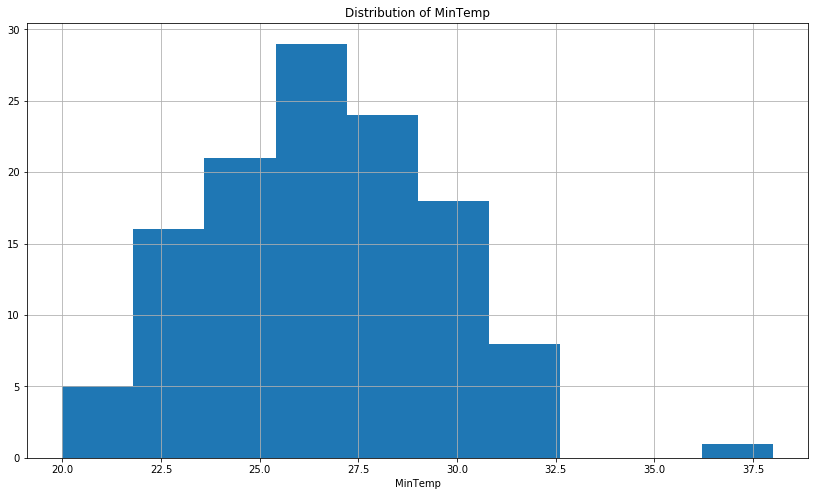

In [33]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]  
df.MinTemp.hist()  
plt.title('Distribution of MinTemp')  
plt.xlabel('MinTemp')  
plt.show() 

In [34]:
df.corr()[['meantempm']].sort_values('meantempm')

,meantempm
maxdew,0.054047
meantempm_3,0.137227
mindew,0.158428
meantempm_2,0.341145
meantempm_1,0.424698
MaxTemp,0.745693
MinTemp,0.862191
meantempm,1.000000


In [36]:
predictors = ['meantempm_1', 'MinTemp','maxdew', 'mindew',  
              'MaxTemp']
df2 = df[['meantempm'] + predictors]

In [37]:
df2

,meantempm,meantempm_1,MinTemp,maxdew,mindew,MaxTemp
date,,,,,,
01-Apr-19,27,NaN,21,24,20,33
02-Apr-19,26,27.0,22,23,21,29
03-Apr-19,29,26.0,24,21,20,34
04-Apr-19,28,29.0,23,25,21,33
05-Apr-19,29,28.0,24,22,20,34
06-Apr-19,27,29.0,23,24,21,31
07-Apr-19,27,27.0,23,24,22,32
08-Apr-19,28,27.0,23,25,21,33
09-Apr-19,31,28.0,28,23,20,33


In [51]:
df_data=df.ix[:,(5,11)].values
df_data_names= ['meantempm','MaxTemp']
y= df.ix[:,9].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:


# we are sing pandas for this example

# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features= pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/temps.csv')
features.head()



,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2019,7,1,Fri,45,45,45.6,45,43,50,44,29
1,2019,7,2,Sat,44,45,45.7,44,41,50,44,61
2,2019,7,3,Sun,45,44,45.8,41,43,46,47,56
3,2019,7,4,Mon,44,41,45.9,40,44,48,46,53
4,2019,7,5,Tues,41,40,46.0,44,46,46,46,41


In [73]:
print('The shape of our features is:', features.shape)

The shape of our features is: (122, 397)


In [76]:
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [57]:
 # Convert to numpy array
features = np.array(features)

In [58]:


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features = train_test_split(features, test_size = 0.25, random_state = 42)



In [79]:
labels = np.array(features['actual'])
 
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)
 
feature_list = list(features.columns)
 
features = np.array(features)

In [80]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [81]:
# Convert to numpy array
features = np.array(features)

In [82]:
from sklearn.model_selection import train_test_split

train_features, test_features = train_test_split(features, test_size = 0.25, random_state = 42)

In [83]:


print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)



Training Features Shape: (21, 17)
Training Labels Shape: (21,)
Testing Features Shape: (8, 17)
Testing Labels Shape: (8,)


In [84]:
baseline_preds = test_features[:, feature_list.index('average')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  4.64


In [85]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [86]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.88 degrees.


In [87]:
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy Of The Temparature :', round(accuracy, 2), '%.')

Accuracy Of The Temparature : 92.61 %.
